In [20]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from torch.utils.data import DataLoader, TensorDataset

In [21]:
imgs = torch.load("linear_imgs.pt")

In [22]:
imgs = imgs.squeeze(1)

In [23]:
imgs.shape

torch.Size([10000, 76, 77])

In [24]:
imgs[0].max()

tensor(1.)

In [25]:
# plt.imshow(sample_imgs[3])

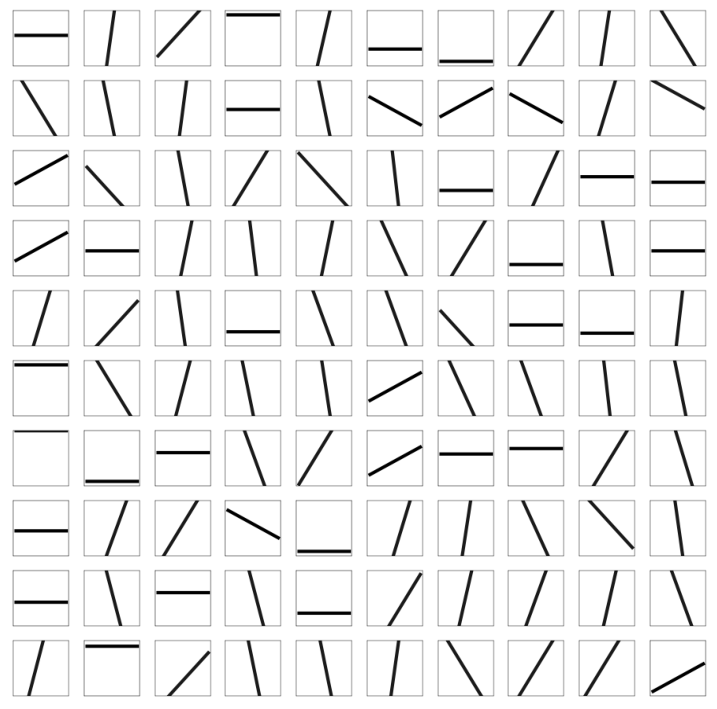

In [26]:
# num_samples = 25
sample_imgs = [i for i in imgs]

fig = plt.figure(figsize=(9, 9))
grid = ImageGrid(fig, 111, nrows_ncols=(10,10), axes_pad=0.1)

for ax, im in zip(grid, sample_imgs):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
plt.show()

In [27]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(device)

mps


In [28]:
dataset = TensorDataset(imgs)
batch_size = 64
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [30]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(76 * 77, 256),
            nn.ReLU(),
            nn.Linear(256, 8),
            nn.ReLU(),
            nn.Linear(8, 256),
            nn.ReLU(),
            nn.Linear(256, 76 * 77),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = x.view(-1, 76*77)
        logits = self.linear_relu_stack(x)
        return logits

In [31]:
model = NeuralNetwork().to(device)

In [32]:
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=5852, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=5852, bias=True)
    (7): Sigmoid()
  )
)


In [33]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [34]:
def train(data, model, loss_fn, optimizer, id):
    size = len(data)
    model.train()
    loss_total = 0

    for x in dataloader:
        x = x[0].to(device)
        
        pred = model(x)
        loss = loss_fn(pred, x.view(-1, 76*77))
        loss_total += loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    if (id % 10 == 0):
        print(loss_total)
    

In [35]:
train(imgs, model, loss_fn, optimizer, 1)

In [36]:
for i in range(1000):
    train(imgs, model, loss_fn, optimizer, i)

2.5484124831855297
2.00902583822608
1.9158973237499595
1.5931428726762533
1.4569750088267028
1.2965570497326553
1.1424641879275441
1.0505988150835037
0.9974640775471926
0.9974897461943328
0.9120973360259086
0.8273800844326615
0.8225326540414244
0.760836093686521
0.7712646797299385
0.7190088897477835
0.7383050208445638
0.681612646440044
0.755607163766399
0.6799753988161683
0.7100416300818324
0.6618559067137539
0.6048061985056847
0.6380780793260783
0.6172261962201446
0.5926512232981622
0.5989373631309718
0.5918837002245709
0.5690765934996307
0.5547055357601494
0.6444962588138878
0.5394396909978241
0.567727052140981
0.5342807153938338
0.5414777884725481
0.5804932173341513
0.5381326597416773
0.5798159905243665
0.7249510681722313
0.5492489335592836
0.5134269740665331
0.5077671541366726
0.5224772928049788
0.4920824817381799
0.49716110108420253
0.48646189144346863
0.5293557441327721
0.5248838965781033
0.4851732011884451
0.5460836173733696
0.49858796526677907
0.5221558552002534
0.4827759866602

KeyboardInterrupt: 

In [37]:
to_print = []

for i in range(25):
    pred = model(imgs[i].to(device))
    pred = pred.view(76,77)
    to_print += [imgs[i], pred.to("cpu").detach().numpy()]

In [38]:
# to_print

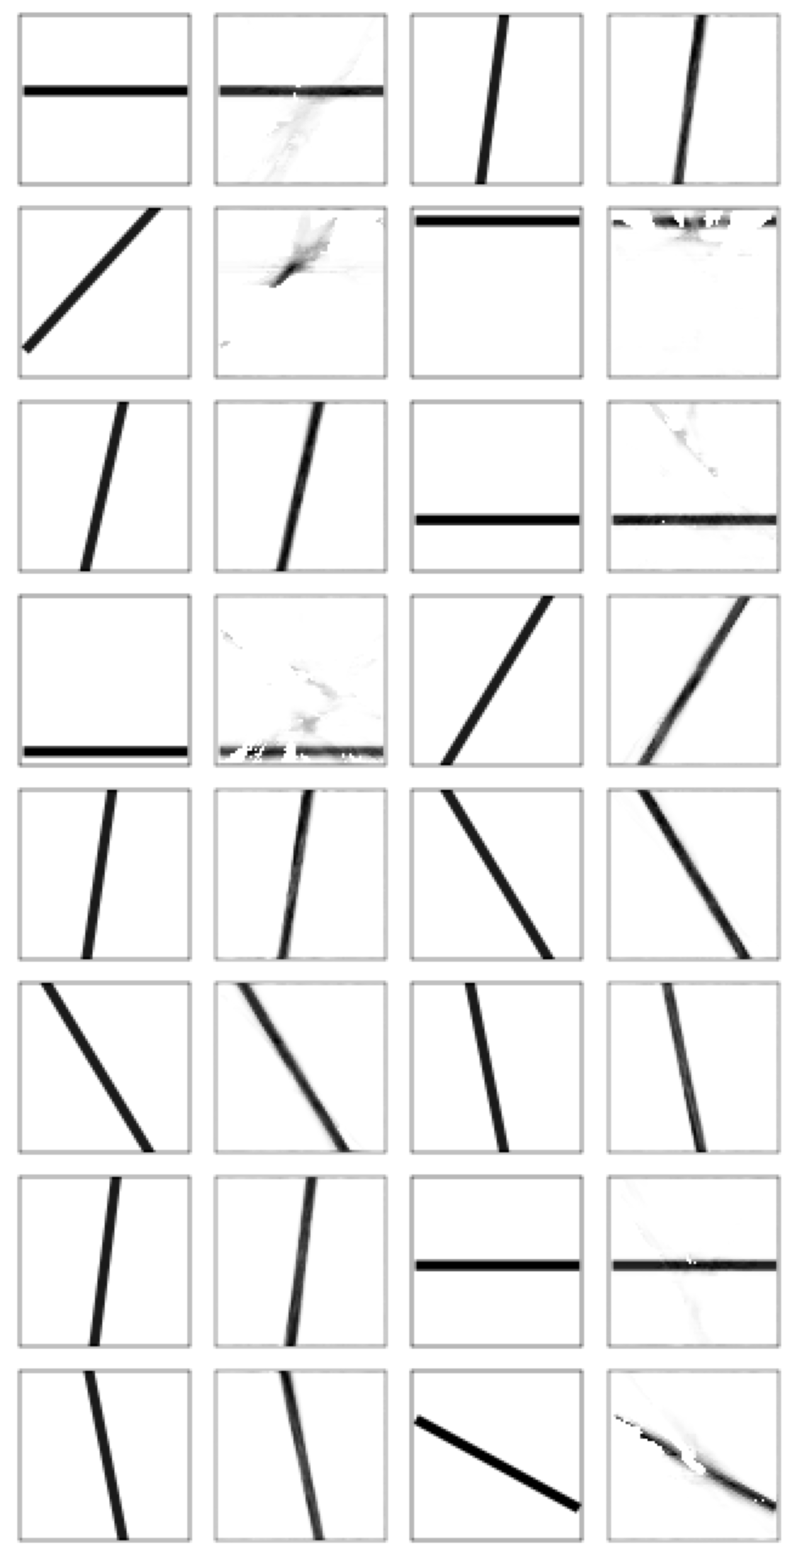

In [39]:
fig = plt.figure(figsize=(20, 20))
grid = ImageGrid(fig, 111, nrows_ncols=(8,4), axes_pad=0.1)

for ax, im in zip(grid, to_print):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
plt.show()